# Handwritten Digit Classifier



In [1]:
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.models import model_from_yaml
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from ucl_masterclass import *
import pickle



%matplotlib inline

/Users/ishankhurana/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/ishankhurana/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


The code below is used to visualise the images from the data set. 

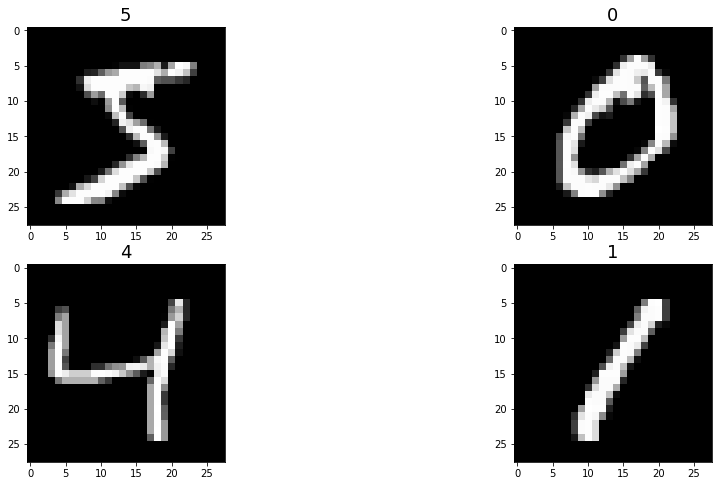

In [2]:
#load (download if needed) the MNIST dataset
(x_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
fig = plt.figure()
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.title(y_train[0],fontsize = 18)
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.title(y_train[1],fontsize = 18)
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.title(y_train[2],fontsize = 18)
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.title(y_train[3],fontsize = 18)

fig.set_size_inches(16,8)


# show the plot
plt.show()

## Understanding the data

In [3]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


![Pixel_grid](http://www.buttonshy.com/championland/003-4.jpg)

# Preprocessing the data


To be a good data scientist or AI engineer it is essential that you understand your data set. We've seen that the data set is full of images and corresponding labels. But what how are the images actually stored and how are they read by the algorithm? 

To see this let's look at one of the images by *printing* it rather than displaying it as an image. 

The images from MNIST are in the form of 28 x 28 matrices containing values between 0 and 255. These are converted to a flat 784 element numpy array with values between 0 and 1. 

In [ ]:
print(x_train[0])

In [5]:
# flatten 28*28 images to a 784 vector for each image
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(x_train.shape[0], 784).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32')

x_train = x_train/255
x_test = x_test/255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = 10



Keras Sequential Guide:

* https://keras.io/getting-started/sequential-model-guide/

## The Architecture of a Neural Network


![Neural Network](https://i.stack.imgur.com/OH3gI.png)



In [6]:

num_pixels = 784
num_classes = 10

def classifier():
    """
    Creates an model for MNIST image classification with input dimension 784
    returns: Keras model
    """
    
    model = Sequential()
    model.add(Dense(num_pixels,input_dim=num_pixels,kernel_initializer='normal',activation='relu'))
    model.add(Dense(int(num_pixels*2),activation='relu'))
    model.add(Dense(int(num_pixels*2),activation='relu'))
    model.add(Dense(int(num_pixels*2),activation='relu'))
    
    model.add(Dense(num_classes,activation='softmax'))
    
    

    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model


# Create and compile model

model = classifier()
model.fit(x_train,y_train,validation_data=(x_test, y_test), epochs=12, batch_size=200,verbose = 1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 52s 863us/step - loss: 0.2154 - acc: 0.9338 - val_loss: 0.1216 - val_acc: 0.9645
Epoch 2/12
25400/60000 [===========>..................] - ETA: 30s - loss: 0.0795 - acc: 0.9752

KeyboardInterrupt: 

## Testing the Neural Network



In [44]:
import os
os.popen('python take_image.py')

** The code below will make our neural network classify the image we just took**

In [ ]:
example_img = load('number.pkl')
example = example_img.reshape(1,784)
example = example/255
# example = scaler.transform(example)

solution  = model.predict(example)
print("Solution ",solution)
# Plot image and print classification
fig = plt.figure()
plt.subplot(221)
plt.imshow(example_img, cmap=plt.get_cmap('gray'))
fig.set_size_inches(12,9)
solution = str(np.argmax(solution))
plt.title("This image is classified as "+solution)

## Using Convolutional Neural Network 

Here a more advanced neural network known as a Convolutional Neural Network (CNN) has been implemented and can do image classification better accuracy. Let's see what we get by using the CNN. 

Loading...
Loading...
Solution  [[3.7017085e-08 6.1906537e-04 9.5198629e-04 2.0232254e-05 1.2036145e-03
  2.9489217e-06 7.8213418e-09 9.9667227e-01 5.2796004e-06 5.2457937e-04]]


Text(0.5,1,'This image is classified as 7')

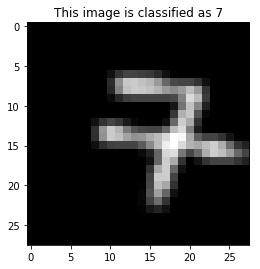

In [45]:
# Test loaded model
model_loaded = load('../neural_nets/conv2d.pkl');
model_loaded = model_from_yaml(model_loaded)
model_loaded.load_weights('../neural_nets/conv2d_weights')

example_img = load('number.pkl')
example = example_img.reshape(1,28,28,1)
example = example/255
# example = scaler.transform(example)

solution  = model_loaded.predict(example)
print("Solution ",solution)
# Plot image and print classification
fig = plt.figure()
plt.subplot(221)
plt.imshow(example_img, cmap=plt.get_cmap('gray'))
fig.set_size_inches(12,9)
solution = str(np.argmax(solution))
plt.title("This image is classified as "+solution)
